# Банки — Анализ оттока клиентов

## **Содержание**

1.[**Шаг 1. Откроем файл и изучим общую информацию**](#Шаг_1)

 1.1 [Вывод 1](#В1)
 
2.[**Шаг 2. Предобработка данных**](#Шаг_2)

 2.1 [Переименуем и приведем к нижнему регистру столбцы](#2.1)
 
 2.2 [Обработка пропусков](#2.2)
 
 2.3 [Приведем столбцы к типу int](#2.3)

 2.4 [Изучение выбросов](#2.4)
 
 2.5 [ Кодирование](#2.5)
 
 2.4 [ Вывод](#В2)
 
3.[**Шаг 3. Исследовательский анализ данных**](#Шаг_3)

3.1 [Средние и стандартные отклонения признаков](#3.1)

3.2 [Средние и стандартные отклонения признаков по оттоку](#3.2)

3.3 [Корреляция признаков с оттоком](#3.3)

3.4 [Отток в категориальных и дискретных признаках](#3.4)

3.5 [Отток в непрерывных признаках](#3.5)

3.6 [Вывод 3.](#В3)
Cоставим портреты типичных клиентов:
   - признаки клиентов, которые склонны к уходу и
   - признаки клиентов, которые не склонны уходить](#В3)
   
4.[**Шаг 4.Статистический анализ данных**](#Шаг_4)

 4.1 [Гипотеза 1 о различии дохода между теми клиентами,которые     
     склонны и не склонны уходить из банка.](#4.1)

 4.2 [Гипотеза 2 о различии возраста между теми клиентами , которые ушли и теми, которые остались](#4.2)

 4.3 [Вывод 4.](#В4)
 
5. [**Шаг 5 Сегментация пользователей по оттоку**](#Шаг_5)

  5.1 [Объединяя признаки отточсти сформируем сегменты.](#5.1)

  5.2 [Выбор сегментов с максимальным оттоком, визуализация.](#5.2)

  5.3 [Вывод 5.](#В5)
  
6. [**Шаг 6 Общий вывод** ](#Шаг_6)

  6.1 [Рекомендации](#6.1)
  
7. [**Приложение**](#7)

 7.1 [Презентация](#7.1)

 7.2 [Дашборд](#7.2)

# Шаг 1. Откроим файл и изучим общую информацию.<a id="Шаг_1"></a> 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mTicker
import numpy as np
import scipy.stats as st
import math 
import warnings
warnings.simplefilter('ignore')
import plotly.express as px
#import scipy.stats as stats
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter('ignore')

In [2]:
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
except Exception as e:
    print("Ошибка при загрузке данных:", e)
    df = pd.read_csv("bank_scrooge.csv")

In [3]:
df.head()

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


В датасете 12 колонок и 10 тысяч строк. Пропуски в столбцах **balance** и **age** . Категориальные данные **last_activity** и **credit_card**  преобразованы в систему 1/0. Пол клиента (**age**)  имеет значения М и Ж.Типы данных в столбцах **est_salary**, **score**,**age**  можно привести к целочисленному формату.

In [5]:
percent_null = pd.DataFrame(round(df.isna().mean()*100,2)).style.background_gradient('coolwarm')
percent_null

Около 23 % пропусков в столбце **balance** и 0.26% в столбце **age**.

In [6]:
df['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

В данных три города.

In [7]:
df['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

Мужчин и женщин практически равное количество. 

In [8]:
df.columns = df.columns.str.lower()
df.rename(columns = {'userid':'user_id'}, inplace = True)

In [9]:
print('Наименьшая зарплата клиента:', df['est_salary'].min())
print('Наибольшая зарплата:', df['est_salary'].max())

Наименьшая зарплата клиента: 2546.3
Наибольшая зарплата: 1395064.45


In [10]:
print('Минимальный возраст клиента:', df['age'].min())
print('Максимальный возраст клиента:', df['age'].max())

Минимальный возраст клиента: 18.0
Максимальный возраст клиента: 86.0


In [11]:
print('Минимальный баланс на карте:', df['balance'].min())
print('Максимальный баланс на карте:', df['balance'].max())

Минимальный баланс на карте: 0.0
Максимальный баланс на карте: 119113552.01


In [12]:

df['churn'].value_counts()

0    8180
1    1820
Name: churn, dtype: int64

Ушедших 18%

Аномальных данных в таблице нет. Возраст клиентов от 18 до 86 лет, заработная плата от 2546 до 1395064 рублей. Минимум может быть обусловлен сдельным доходом или подработкой студентов.Минимальное значение баланса равно 0.

Построим общую гистограмму для всех числовых столбцов.

array([[<AxesSubplot: title={'center': 'user_id'}>,
        <AxesSubplot: title={'center': 'score'}>,
        <AxesSubplot: title={'center': 'age'}>],
       [<AxesSubplot: title={'center': 'equity'}>,
        <AxesSubplot: title={'center': 'balance'}>,
        <AxesSubplot: title={'center': 'products'}>],
       [<AxesSubplot: title={'center': 'credit_card'}>,
        <AxesSubplot: title={'center': 'last_activity'}>,
        <AxesSubplot: title={'center': 'est_salary'}>],
       [<AxesSubplot: title={'center': 'churn'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

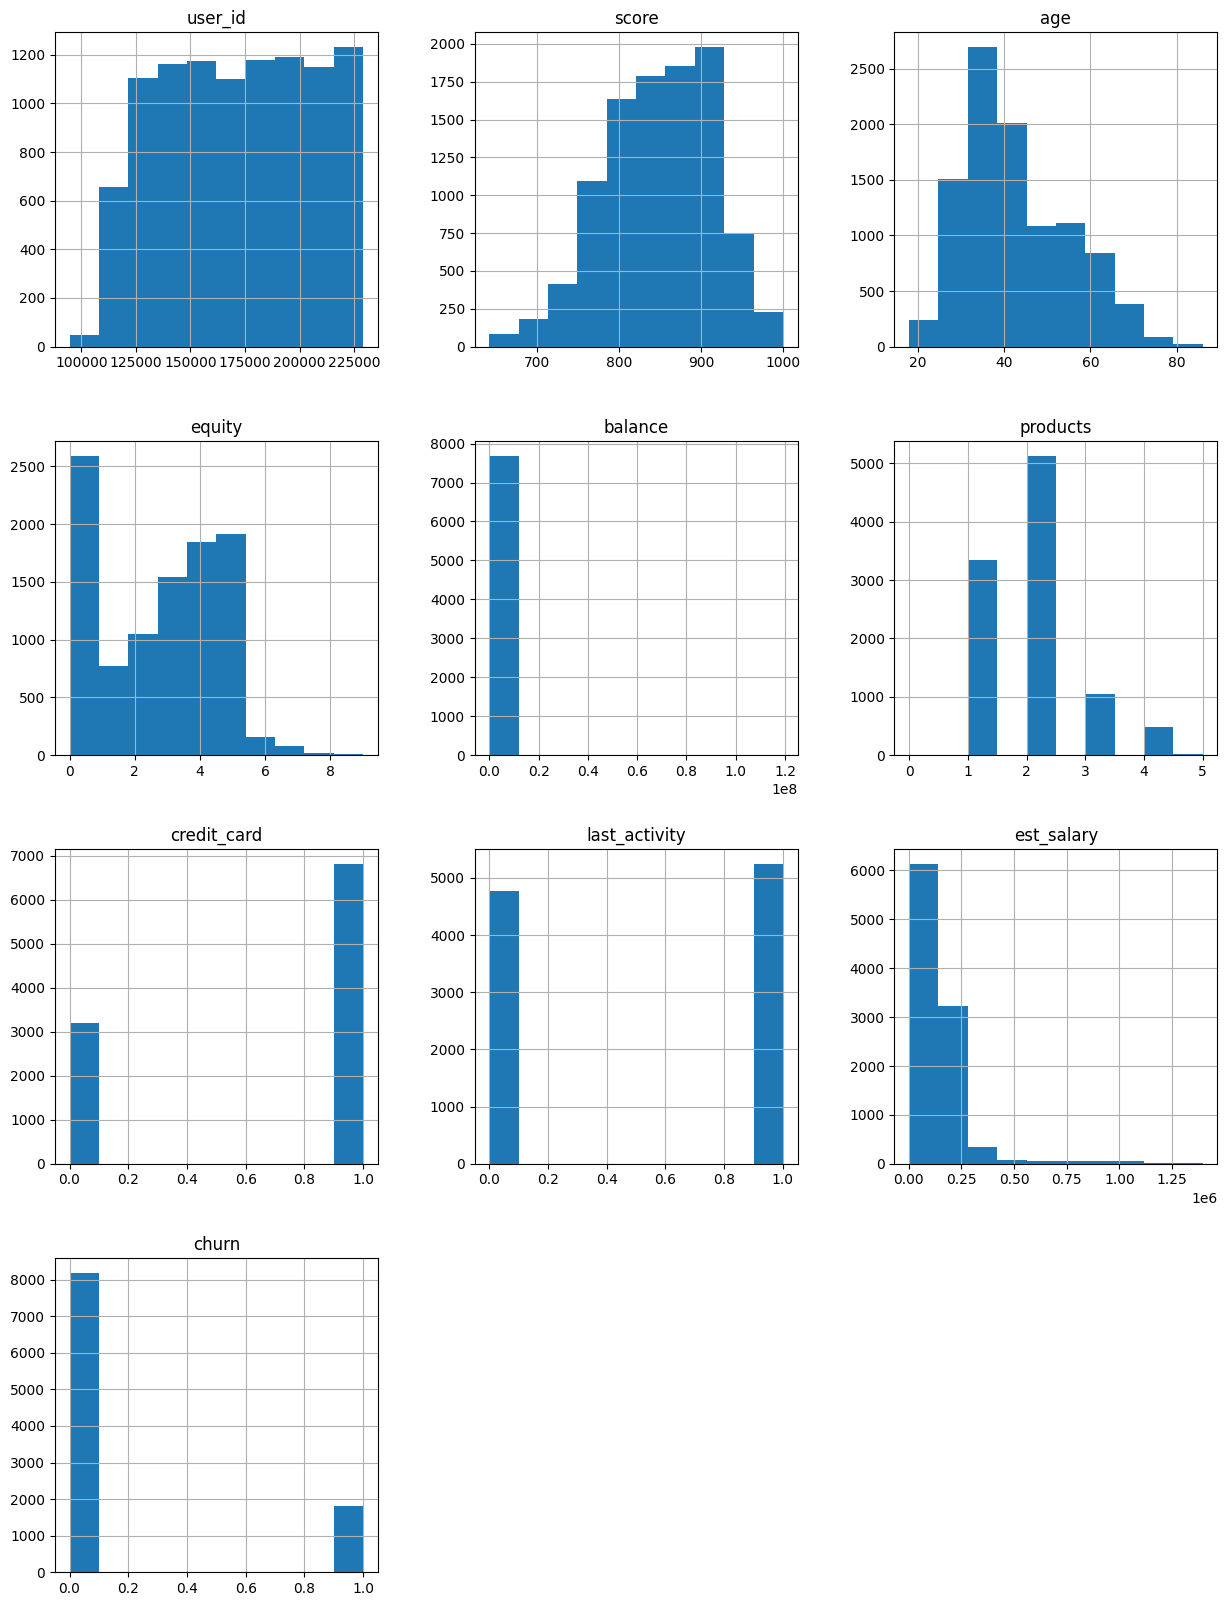

In [13]:
df.hist(figsize = (15,20))

## Вывод 1.<a id="В1"></a>

В Шаге 1 загрузили датасет и изучили данные.

В датасете 12 колонок и 10 тысяч строк. Категориальные данные **last_activity и credit_card** преобразованы в систему 1/0. Пол клиента (age) имеет значения М и Ж.Типы данных в столбцах **est_salary, score, age** для дальнейшей работы надо привести к целочисленному формату .

Названия столбцов требуют коррекции,определили % пропусков. Около 23 % пропусков в столбце balance и 0.26% в столбце age. Пропуски  в столбце **age** менее 1 %, удалим. Пропуски в столбце **dalance** заменить скорее всего не получится, но мы их поизучаем на этапе предобработки. Скорее всего они имеют природу технического характера, у нас есть счета с нулевым балансом и заменять пропуски нулями неправильно, средним значениями по возрастным категориям или каегориям **equity** тоже, так как это деньги и они могут быть в непредсказуемых количествах у разных категорий клиентов.У человека с низкой зарплатой, например, средства от продажи наследной квартиры, а у клиента с высоким доходом - ипотека и минимальное количество на счету. В нашем случае пропусков около 23% и заполнение их может сильно исказить реальную картину.

В данных три города: Ярославль, Рыбинск, Ростов. Примерно половина клиентов пользуется услугами банка в Ярославле, остальные пополам распределены по двум другим городам. 
Клиентов обоих полов практически равное количество:мужчин -5005, женщин - 4995.
Распределение возраста клиентов имеет длинный хвост в большую сторону, в основном возраст клиентов 30-50 лет. 
Зарплата клиентов распределена почти равномерно,но имеет длинный хвост вправо. 
Баланс на карте варьируется от 0 до 119113552 рублей.
Все клиенты используют от 1 до 5 продуктов банка, чаще всего 2 продукта. 
Кредитная карта есть у 75% клиентов. 
Активных около 50% клиентов. 
18% клиентов перестали пользоваться услугами банка.

# Шаг 2. Предобработка данных.<a id="Шаг_2"></a>

**Переименуем и приведем к нижнему регистру столбцы.**<a id="2.1"></a>

In [14]:
df.columns = df.columns.str.lower()
df.rename(columns = {'userid':'user_id'}, inplace = True)
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [15]:
df.duplicated().sum()

0

Дубликатов нет.

**2.2 Обработка пропусков**<a id="2.2"></a>

Пропуски в столбце Balance

In [16]:
df.groupby('churn')['balance'].apply(lambda x: x.isna().sum())

churn
0    2282
1      13
Name: balance, dtype: int64

Основная масса пропусков приходится на тех,кто остался.

In [17]:
df.groupby('city')['balance'].apply(lambda x: x.isna().sum())

city
Ростов        235
Рыбинск       593
Ярославль    1467
Name: balance, dtype: int64

По городам тоже везде присутствуют. В большей мере в Ярославле.

In [18]:
df.groupby('credit_card')['balance'].apply(lambda x: x.isna().sum())

credit_card
0     423
1    1872
Name: balance, dtype: int64

In [19]:
df.groupby('products')['balance'].apply(lambda x: x.isna().sum())

products
0       1
1    1950
2     315
3      29
4       0
5       0
Name: balance, dtype: int64

Пропуски присутствуют и у людей с кредитками и без, в большей же степени у активных клиентов с одним продуктом, кредитной картой, в Ярославле. Заполнять и удалять не будем.

Удалим пропуски в столбце **age**.

In [20]:
df.dropna(subset = ['age'],inplace = True)
df = df.reset_index(drop=True)
df['age'].isnull().sum()

0

**2.3 Приведем столбцы к типу int**<a id="2.3"></a>

In [21]:
df = df.astype({"age": "int64",'est_salary':'int64','score':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   int64  
 11  churn          9974 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 935.2+ KB


In [22]:
df.head()

user_id  score       city gender  age  equity     balance  products  \
0   183012    850    Рыбинск      Ж   25       1    59214.82         2   
1   146556    861    Рыбинск      Ж   37       5   850594.33         3   
2   120722    892    Рыбинск      Ж   30       0         NaN         1   
3   225363    866  Ярославль      Ж   51       5  1524746.26         2   
4   157978    730  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  
0            0              1       75719      1  
1            1              0       86621      0  
2            1              1      107683      0  
3            0              1      174423      1  
4            1              0       67353      1

**2.4 Изучим выбрососы**<a id="2.4"></a>

In [23]:
df.describe()

user_id        score          age       equity       balance  \
count    9974.000000  9974.000000  9974.000000  9974.000000  7.695000e+03   
mean   171755.218669   848.682575    42.734409     2.630840  8.272456e+05   
std     33695.527126    65.399720    12.179971     1.979965  1.980327e+06   
min     94561.000000   642.000000    18.000000     0.000000  0.000000e+00   
25%    142760.000000   802.000000    33.000000     0.000000  2.956987e+05   
50%    172643.000000   853.000000    40.000000     3.000000  5.242953e+05   
75%    201163.750000   900.000000    51.000000     4.000000  9.800512e+05   
max    229145.000000  1000.000000    86.000000     9.000000  1.191136e+08   

          products  credit_card  last_activity    est_salary        churn  
count  9974.000000  9974.000000    9974.000000  9.974000e+03  9974.000000  
mean      1.871466     0.680168       0.522859  1.477863e+05     0.182374  
std       0.792729     0.466435       0.499502  1.392855e+05     0.386172  
min       0.000000     0.000000       0.000000  2.546000e+03     0.000000  
25%       1.000000     0.000000       0.000000  7.525125e+04     0.000000  
50%       2.000000     1.000000       1.000000  1.196265e+05     0.000000  
75%       2.000000     1.000000       1.000000  1.744990e+05     0.000000  
max       5.000000     1.000000       1.000000  1.395064e+06     1.000000

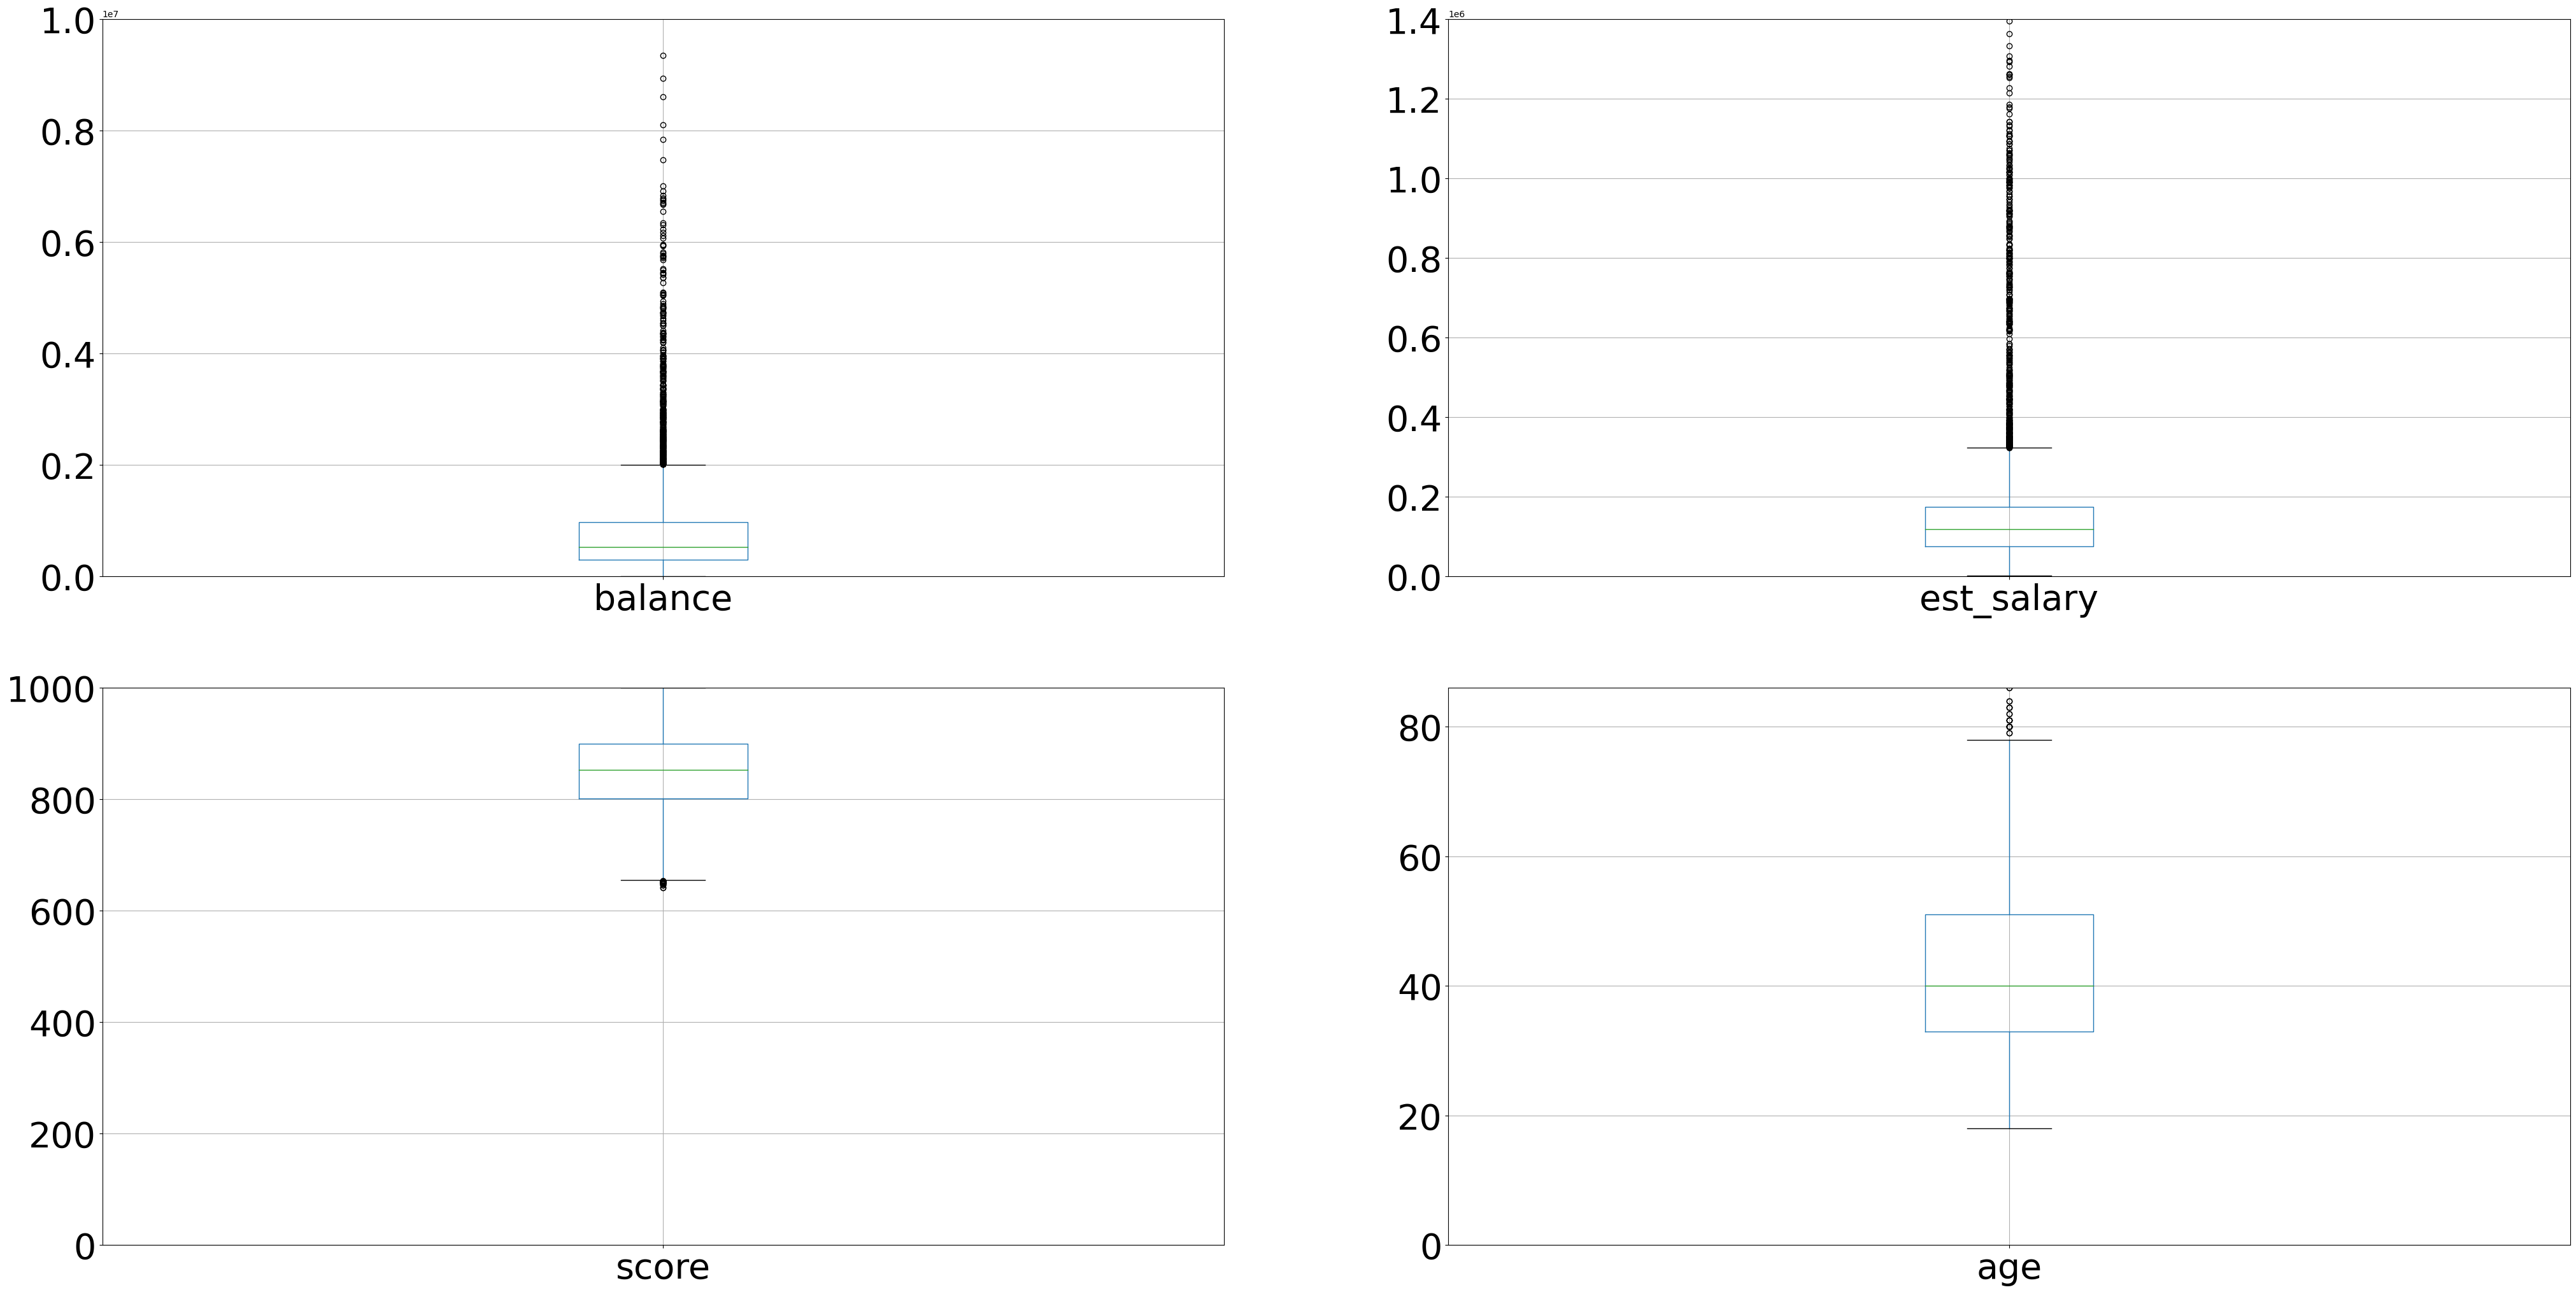

In [24]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['balance','est_salary', 'score', 'age']
               
ylims = [10000000, 1400000, 1000, 86]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = df.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

Аномальных значений нет. В числовых данных max реальные, min тоже, отрицательных значений нет.Средние показатели вопросов не вызывают за исключением медианы заработной платы 120 тыс.руб. Для городов представленных в данных средний уровень 50 - 55тыс. рублей. Такие показатели могут иметь место , если банк имеет договора с предприятиями с высоким уровнем заработной платы и клиенты имеют зарплатные карты именно в этом банке.

**2.5 Кодирование**<a id="2.5"></a>

Кодирование значений столбца **city**

In [25]:
df.head()

user_id  score       city gender  age  equity     balance  products  \
0   183012    850    Рыбинск      Ж   25       1    59214.82         2   
1   146556    861    Рыбинск      Ж   37       5   850594.33         3   
2   120722    892    Рыбинск      Ж   30       0         NaN         1   
3   225363    866  Ярославль      Ж   51       5  1524746.26         2   
4   157978    730  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  
0            0              1       75719      1  
1            1              0       86621      0  
2            1              1      107683      0  
3            0              1      174423      1  
4            1              0       67353      1

In [26]:
df_1 = pd.get_dummies(df, columns=['city', 'gender'])
df_1.head()

user_id  score  age  equity     balance  products  credit_card  \
0   183012    850   25       1    59214.82         2            0   
1   146556    861   37       5   850594.33         3            1   
2   120722    892   30       0         NaN         1            1   
3   225363    866   51       5  1524746.26         2            0   
4   157978    730   34       5      174.00         1            1   

   last_activity  est_salary  churn  city_Ростов  city_Рыбинск  \
0              1       75719      1            0             1   
1              0       86621      0            0             1   
2              1      107683      0            0             1   
3              1      174423      1            0             0   
4              0       67353      1            0             0   

   city_Ярославль  gender_Ж  gender_М  
0               0         1         0  
1               0         1         0  
2               0         1         0  
3               1         1         0  
4               1         0         1

Заменим значения в столбце gender на числа.

# Вывод 2. <a id="В2"></a>
- В Шаге 2 привели столбцы к нижнему регистру
- проверили наличие дубликатов
- удалили пропуски (0.26%) в столбце **age**
- заменили типы данных
- посмотрели на min и max данных, аномалий не обнаружено.
- кодировали значение столбца **city** и **gender**

# Шаг 3. Исследовательский анализ данных<a id="Шаг_3"></a>

##  Исследуем долю оттока для каждого из признаков

In [27]:
c = df['churn'].value_counts() 
fig = px.pie(c, values='churn', names=c.index)
fig.update_layout(
    height=450,
    showlegend=True,
    title='Соотношение ушедших и оставшихся клиентов банка',
    legend_title='Категории'
)
fig.show()

In [28]:
df_no_id = df_1.drop('user_id', axis=1)

Удалим столбец **user_id**, чтобы не сбивал нас суммами и средними значениями.

**3.1 Посмотрим на  средние значений признаков и стандартное  отклонение**<a id="3.1"></a>

In [29]:
df_mean= df_no_id.agg(['mean','std']).T.round(2)
df_mean

mean         std
score              848.68       65.40
age                 42.73       12.18
equity               2.63        1.98
balance         827245.59  1980327.41
products             1.87        0.79
credit_card          0.68        0.47
last_activity        0.52        0.50
est_salary      147786.32   139285.51
churn                0.18        0.39
city_Ростов          0.14        0.35
city_Рыбинск         0.27        0.44
city_Ярославль       0.59        0.49
gender_Ж             0.50        0.50
gender_М             0.50        0.50

Эти значения мы уже видели на этапе знакомства с даннными,средний отток клиентов - 18%.
Посмотрим на значения в привязке к столбцу **churn**

**3.2 Посмотрим на  средние значений признаков и стандартное  отклонение признаков по оттоку**<a id="3.2"></a>

In [30]:
df_mean_churn = df_no_id.groupby('churn').agg('mean').round(2).T
df_union= df_mean_churn.join(df_mean)
df_union = df_union.rename(columns = {0:'stay', 1:'churn'})
df_union                         

stay       churn       mean         std
score              845.40      863.42     848.68       65.40
age                 43.02       41.45      42.73       12.18
equity               2.38        3.76       2.63        1.98
balance         733031.63  1134458.21  827245.59  1980327.41
products             1.76        2.38       1.87        0.79
credit_card          0.71        0.55       0.68        0.47
last_activity        0.48        0.70       0.52        0.50
est_salary      147674.15   148289.20  147786.32   139285.51
city_Ростов          0.14        0.15       0.14        0.35
city_Рыбинск         0.28        0.24       0.27        0.44
city_Ярославль       0.58        0.61       0.59        0.49
gender_Ж             0.53        0.35       0.50        0.50
gender_М             0.47        0.65       0.50        0.50

Здесь уже можно увидеть  разницу в некоторых показателях: возраст, пол, активность. Для лучшей наглядности 
нормируем все признаки по формуле: x-x(среднее выборки) / std(стандартное отклонение)
По данной формуле находится стандартизированное значение признака, то есть значение, которое показывает, насколько данное значение признака отличается от среднего значения признака в выборке, выраженного в стандартных отклонениях. Это позволит сравнить значения разных признаков между собой, учитывая их разброс в выборке.

In [31]:

df_norm = pd.DataFrame()
df_norm['stay'] = (df_union['stay'] - df_union['mean'])/df_union['std']
df_norm['churn'] = (df_union['churn'] - df_union['mean'])/df_union['std']
df_norm = df_norm[['stay', 'churn']]
df_norm['distinction'] = abs(df_norm['stay'] - df_norm['churn'])
df_norm.sort_values('distinction',ascending = False)


stay     churn  distinction
products       -0.139241  0.645570     0.784810
equity         -0.126263  0.570707     0.696970
last_activity  -0.080000  0.360000     0.440000
gender_Ж        0.060000 -0.300000     0.360000
gender_М       -0.060000  0.300000     0.360000
credit_card     0.063830 -0.276596     0.340426
score          -0.050153  0.225382     0.275535
balance        -0.047575  0.155132     0.202707
age             0.023810 -0.105090     0.128900
city_Рыбинск    0.022727 -0.068182     0.090909
city_Ярославль -0.020408  0.040816     0.061224
city_Ростов     0.000000  0.028571     0.028571
est_salary     -0.000805  0.003610     0.004416

Можно увидеть существенную разницу между ушедшими и оставшимися в признаках:
**products, equity, last_activity, gender**.

**3.3 Визуализируем корреляцию оттока с остальными признаками**<a id="3.3"></a>

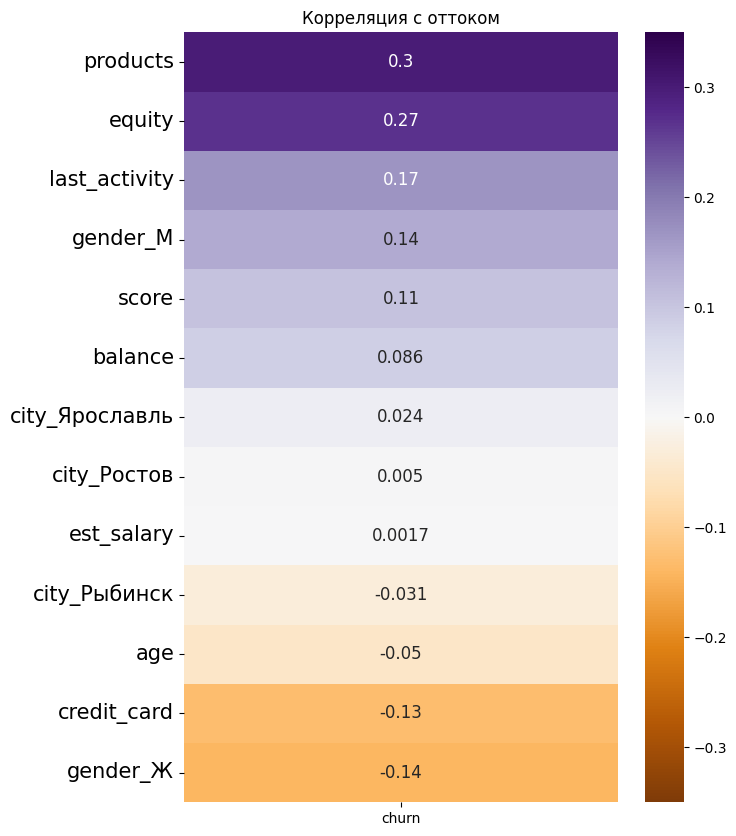

In [32]:
plt.figure(figsize=(7, 10))
heatmap = sns.heatmap(df_no_id.corr()[['churn']].sort_values(by='churn', ascending=False).drop('churn', axis=0), \
                      vmin=-0.350, vmax=0.35, annot=True, annot_kws={"size":12}, cmap='PuOr')
plt.tick_params(axis='y', labelsize=15)

plt.yticks(rotation=0)
heatmap.set_title('Корреляция с оттоком')
plt.show()

Корреляция с оттоком полностью подтверждает наши табличные расчеты. Лидеры те же.

**Посмотрим на графическое отображение процентов оттока в каждой категории.**

Создадим список с названиями признаков на русском, для удобного чтения графиков.

In [33]:

new_columns = ['id пользователя', 'кредитный скоринг', 'город', 'пол', 'возраст', 'баллы собственности',
              'баланс на счете', 'используемые продукты', 'кредитная карта', 'активность', 'заработная плата',
              'отток']
df_dict = dict(zip(df.columns, new_columns))
df_dict

{'user_id': 'id пользователя',
 'score': 'кредитный скоринг',
 'city': 'город',
 'gender': 'пол',
 'age': 'возраст',
 'equity': 'баллы собственности',
 'balance': 'баланс на счете',
 'products': 'используемые продукты',
 'credit_card': 'кредитная карта',
 'last_activity': 'активность',
 'est_salary': 'заработная плата',
 'churn': 'отток'}

**3.4 Посмотрим на процент оттока в категориальных и дискретных признаках**<a id="3.4"></a>

In [34]:
df_category = df[['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn']]


In [35]:
df_churn = df.query('churn == 1')
df_no_churn = df.query('churn == 0')

Ростов       0.187147
Рыбинск      0.162877
Ярославль    0.190128
Name: city, dtype: float64


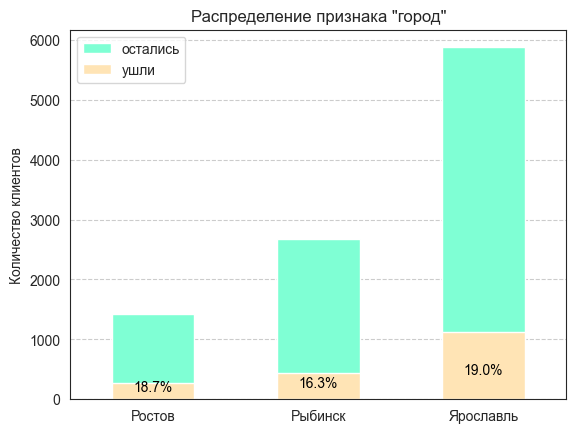

Ж    0.127634
М    0.237027
Name: gender, dtype: float64


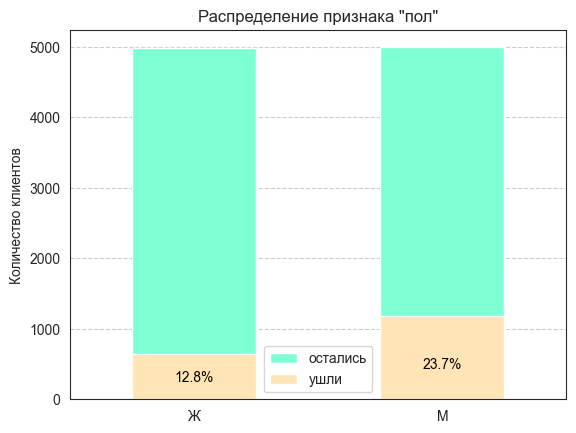

0    0.034938
1    0.120310
2    0.157945
3    0.208955
4    0.251218
5    0.300783
6    0.360248
7    0.462500
8    0.352941
9    0.538462
Name: equity, dtype: float64


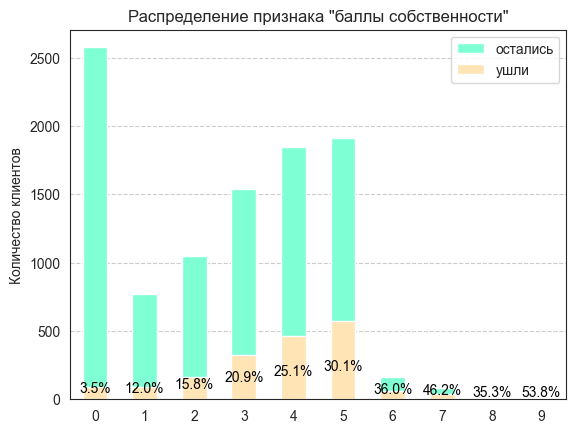

0    1.000000
1    0.070719
2    0.191053
3    0.286127
4    0.632911
5    0.421053
Name: products, dtype: float64


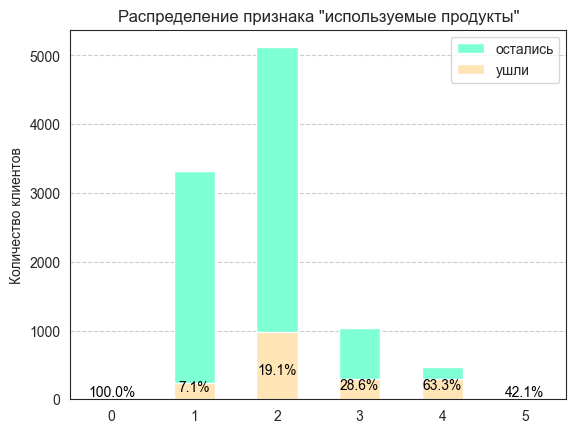

0    0.255799
1    0.147848
Name: credit_card, dtype: float64


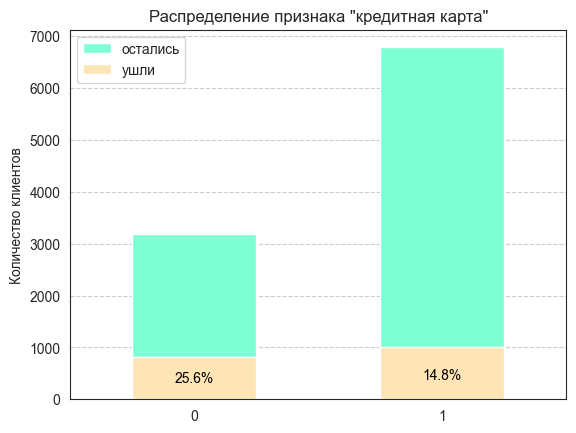

0    0.113889
1    0.244871
Name: last_activity, dtype: float64


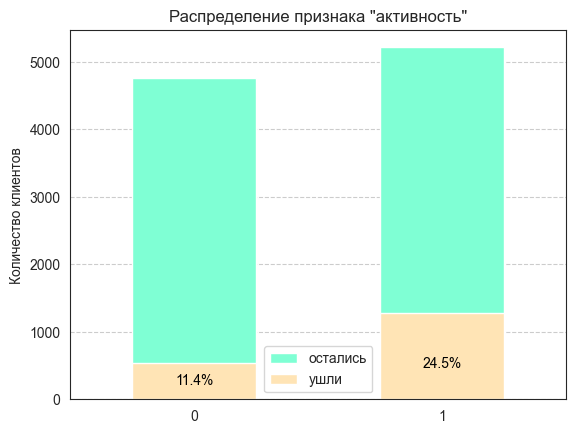

In [36]:
def category(i):    
        
    '''Функция строит гистограмму с накоплением по значениям каждого столбца,
    в виде групп оставшихся и ушедших .% указан для ушедших. 
    
    '''
    data = df[i].value_counts().sort_index()
    data_churn = df_churn[i].value_counts().sort_index()
    share = (data_churn / data).sort_index()
    print(share)
    chart1 = data.plot(kind='bar', color='Aquamarine')
    chart2 = data_churn.plot(kind='bar', color='Moccasin')
    
    for i, rect in enumerate(chart2.patches):
        n = int(len(chart2.patches) / 2.0) 
        if i >= n:
            height = rect.get_height()

            plt.text(rect.get_x() + rect.get_width() / 2.0, height / 3.0, f'{share.iloc[int(i-n)]:1.1%}', 
                     ha='center', va='bottom', color='black')
    plt.title(f'Распределение признака "{df_dict[col]}"')
    plt.xlabel('')
    plt.xticks(rotation=360)
    plt.ylabel('Количество клиентов')
    plt.grid(axis='y', linestyle='--')
    plt.legend(['остались', 'ушли'])    

with sns.axes_style('white'):
    for col in df_category.drop('churn', axis=1).columns:
        category(col)
        plt.show()
        

Сделаем вывод по % оттока в категориальных и дискретных признаках.
Мы помним, что у нас средний отток составляет 18%, посмотрим в каких признаках он  выше среднего.

**Процент оттока выше среднего:**
- в Ярославле(19%), в Ростове (18,7%)
- мужчины(23,7%)
- баллы собственности, 3 балла и выше рост от 20,9% до 53,8% для 9 баллов
- используемые продукты,среди пользующихся 2 продуктами (19,1%), для тех у кого   3 (28,6%), 4 продукта (63,3%)
- отток клиентов без кредиток (25,6%)
- среди лояльных клиентов (24.5%)

**Процент оттока ниже среднего :**

- в Рыбинске (16.3%)
-  женщины (12.8%)
- баллы собственности 0 (3.5%) и 1 (12%)
- для людей пользующихся 1 продуктом(7.1%)
- с кредитной картой (14.8%)
- среди неактивных клиентов (11.4%). Видимо лень сходить закрыть счет.



**3.5 Визуализируем непрерывные признаки методом "sns.histplot".**<a id="3.5"></a>

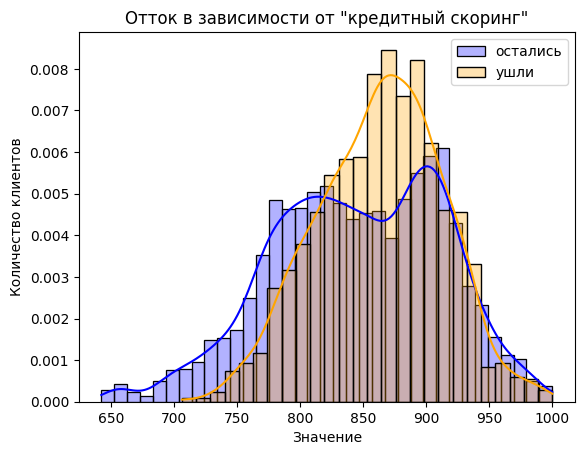

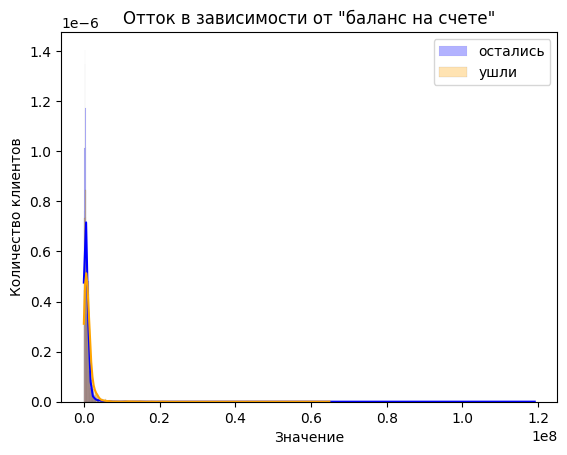

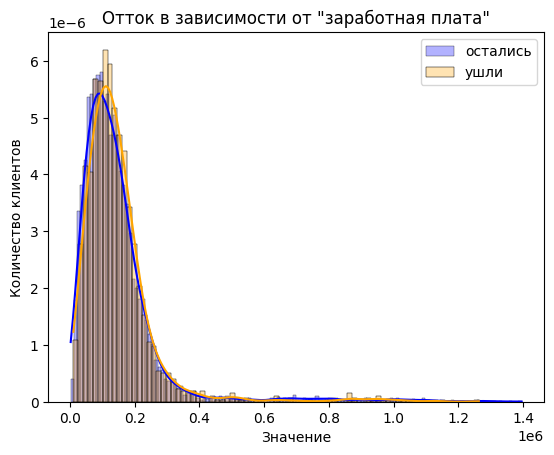

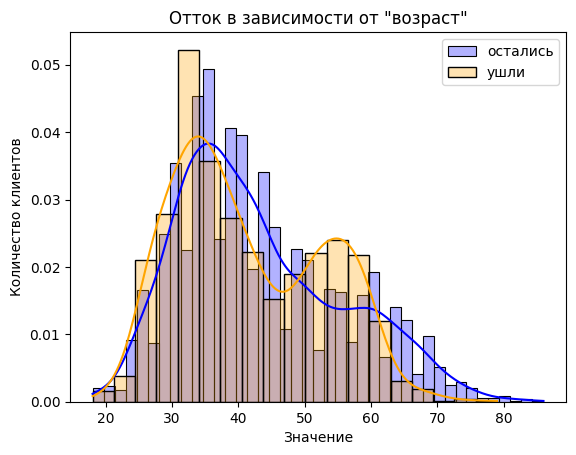

In [37]:

for col in df[['score',  'balance', 'est_salary','age']].columns:
    
    sns.histplot(df.query('churn == 0')[col], color='blue', alpha=0.3, label='остались', kde=True,stat='density')
    sns.histplot(df.query('churn == 1')[col], color='orange', alpha=0.3, label='ушли', kde=True,stat='density')
    plt.title(f'Отток в зависимости от "{df_dict[col]}"')
    plt.ylabel('Количество клиентов')
    plt.xlabel('Значение')
    plt.legend()
    plt.show()



Можно сделать вывод, что всплеск ухода приходится на клиентов с кредитным скорингом от 820-930.
Есть два периода в признаке **age** когда наблюдается отток ,это клиенты в возрасте от 23-33 лет и от 52- 58 лет.
Баланс и заработная плата плохо визуализитуются из-за длинных хвостов, посмотрим подробнее на увеличенное в масштабе их распределение.

In [38]:
df_bal = df.query('balance <= 1000000 & est_salary <= 400000 ')

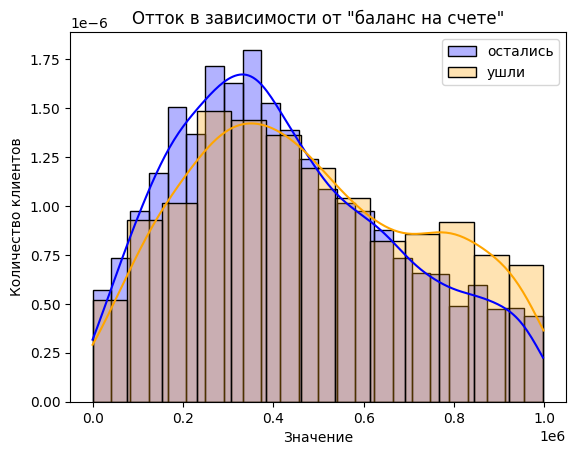

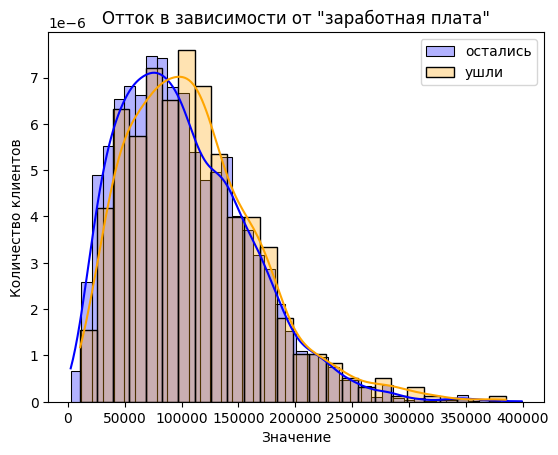

In [39]:
for col in df_bal[['balance','est_salary']].columns:
    
    sns.histplot(df_bal.query('churn == 0')[col], color='blue', alpha=0.3, label='остались', kde=True,stat='density')
    sns.histplot(df_bal.query('churn == 1')[col], color='orange', alpha=0.3, label='ушли', kde=True,stat='density')
    plt.title(f'Отток в зависимости от "{df_dict[col]}"')
    plt.ylabel('Количество клиентов')
    plt.xlabel('Значение')
    plt.legend()
    plt.show()

Здесь уже хорошо видно, что уходят активней при балансе на счете от 600т-1млн. И с заработной платой от 120 - 160 т.р 

## Вывод 3 <a id="В3"></a>
- В Шаге 3 мы сследовали  долю оттока для каждого из признаков
  По результатам исследования можно  увидеть существенную разницу между           ушедшими и оставшимися в признаках: products, equity, last_activity, gender.

- Визуализировали корреляцию оттока с остальными признаками
- Продемонстрировали  графическое отображение оттока в категориальных и           дискретных признаках .

- Смогли определить портреты клиентов которые связаны с повышенным оттоком,и     клиентов не склонных уходить.

**Признаки клиентов, которые склонны к уходу :**

- проживают в  Ярославле или в Ростове 
- мужчины
- баллы собственности 3 и выше.
- используют более 2 продуктов
- без кредитной карты 
- лояльные
- кредитный скорринг от 820-930
- возраст от 23-33 или 52-58
- баланс от 600-1 млн
- зарплата от 120-160 т.р.

**Признаки клиентов, которые не склонны уходить :**

- проживают в Рыбинске 
- женщины 
- баллы собственности <=1
- пользуются 1 продуктом
- с кредитной картой 
- неактивные
- кредитный скорринг <820 или  >930
- возраст =< 23, >=33 ,от 34-52, и старше 58 лет
- баланс < 600 тыс
- зарплата < 120 или  > 160 т.р.

## Шаг 4 Статистический анализ данных<a id="Шаг_4"></a>

**4.1 Проверим гипотезу различия дохода между теми клиентами , которые ушли и теми, которые остались**<a id="4.1"></a>

Ранее мы уже делили выборку на две части 

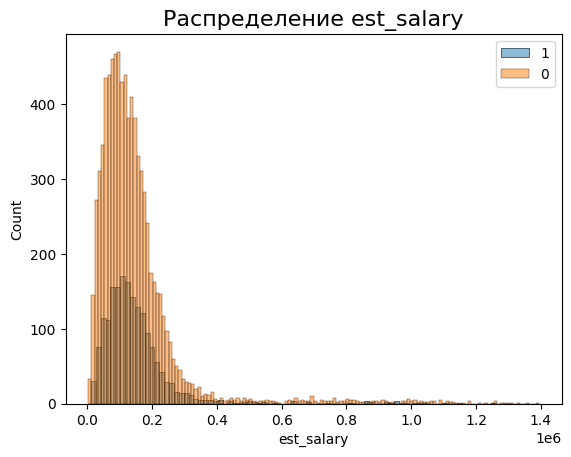

In [40]:
sns.histplot(df_churn['est_salary'],label='1',alpha=0.5)
sns.histplot(df_no_churn['est_salary'],label='0',alpha=0.5)
plt.title('Распределение est_salary',fontsize=16)
plt.legend()
plt.show()

In [41]:
print('Дисперсия ушедших:',df_churn['est_salary'].var())
print('Дисперсия оставшихся:',df_no_churn['est_salary'].var())

Дисперсия ушедших: 15112313209.844198
Дисперсия оставшихся: 20358839655.638016


Дисперсии выборок различаются на 25%. Распределение доходов является непрерывным, ближе к нормальному. Поэтому   будем использовать  метод  t-критерия Стьюдента  в модификации Уэлча из-за разности дисперсий.

Проверим гипотезу о равенстве дохода между теми клиентами, которые ушли и теми, которые остались.

- Н0: доходы у тех клиентов, которые ушли, и у тех, которые остались, равны
- Н1: доходы у тех клиентов, которые ушли, и у тех, которые остались, различны

Критический уровень статистической значимости зададим значение 0.05.

In [42]:
alpha = 0.05 

results = st.ttest_ind(
    df_churn['est_salary'], 
    df_no_churn['est_salary'],equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8515828926028186
Не получилось отвергнуть нулевую гипотезу


Гипотезу о равенстве доходов тех кто ушел и тех кто остался не получилось отвергнуть.

**4.2 Проверим гипотезу различия возраста между теми клиентами , которые ушли и теми, которые остались**<a id="4.2"></a>

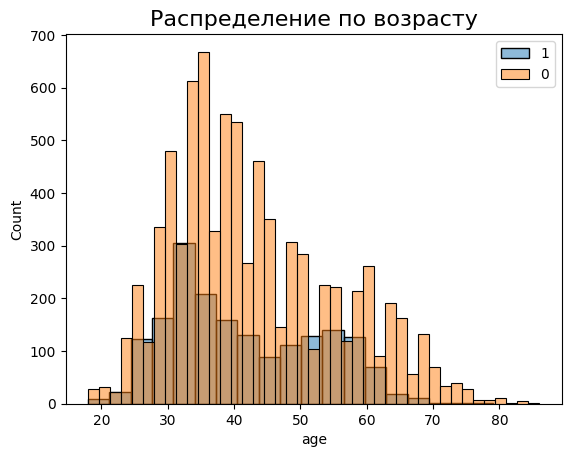

In [43]:
sns.histplot(df_churn['age'],label='1',alpha=0.5)
sns.histplot(df_no_churn['age'],label='0',alpha=0.5)
plt.title('Распределение по возрасту',fontsize=16)
plt.legend()
plt.show()

In [44]:
print('Дисперсия ушедших:',df_churn['age'].var())
print('Дисперсия оставшихся:',df_no_churn['age'].var())

Дисперсия ушедших: 124.91322738650996
Дисперсия оставшихся: 153.14575130756242


Дисперсии выборок различаются. Распределение  нормальное.

Сформируем гипотезы.

- Н0: средний возраст ушедших и оставшихся равен
- Н1: средний возраст ушедших и оставшихся различен



In [45]:

alpha = 0.05 

results = st.ttest_ind(
    df_churn['age'], 
    df_no_churn['age'],equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
   


p-значение: 1.1721656853879547e-07
Отвергаем нулевую гипотезу


Мы отвергли гипотезу о равенстве возраста ушедших и оставшихся.

## Вывод 4.<a id="В4"></a>

В шаге 4 мы проверили две гипотезы:

1. Гипотеза различия дохода между теми клиентами , которые ушли и теми, которые    остались. Итог- не получилось отвергнуть        гипотезу о равенстве среднего          дохода между ушедшими и оставшимися клиентами.



2. Гипотеза различия возраста между теми клиентами , которые ушли и теми, которые остались. Итог- отвергаем гипотезу о            равенстве среднего возраста ушедших и оставшихся. Возрас различен.

# Шаг 5. Сегментация <a id="Шаг_5"></a>

**5.1 Объединяя признаки отточсти сформируем сегменты.**<a id="5.1"></a>

In [46]:
examples = [
    ("клиенты со  скорингом от 820-930", '930 > score and score  > 820 '),
    ("баллы собственности 3 и выше", 'equity >= 3'),
    ("активные Pостовчане", 'city == "Ростов" and last_activity == 1'),
    ("активные Ярославцы", 'city == "Ярославль" and last_activity == 1'),
    (" мужчины", 'gender == "М" '),
    ("без кредитных карт", ' credit_card==0 '),
    (" мужчины без кредитных карт", 'gender == "М" and credit_card==0 '),
    ("активные ", 'last_activity == 1'),
    ("активные без кредитных карт", 'last_activity == 1 and credit_card==0'),
    ("пользователи более 2 продуктов",'products > 2'),
    ("активные пользователи  более 2 продуктов",'products > 2 and last_activity == 1'),
    ("баланс от 600 тыс до 1 млн",'600000 < balance and balance < 1000000'),
    ("зарплата от 120 до 160 т.р.",'est_salary <160000 and est_salary > 120000'),    
    (" активные в возрасте от 23-33",'age > 23 and age <= 33 and last_activity == 1'),
    (" в возрасте от 52-58 ",'age > 52 and age <= 58  '),
    (" в возрасте от 23-33 ",'age > 23 and age <= 33  '),
    ("мужчины использующие более 2 продуктов", 'gender == "М" and products > 2 '),
    
]

results = pd.DataFrame(columns=['elements', 'count', 'percent'])
results.style.format("{:.1%}",subset=["percent"])

for example in examples:
    elements = example[0]
    condition = example[1]
    
  
    filtered_df = df.query(condition)
    
    count = filtered_df['churn'].sum()
    percent = round(count / len(filtered_df) * 100,1)
     
    results = results.append({'elements': elements, 'count': count, 'percent': percent}, ignore_index=True).\
    sort_values('count',ascending = False)
    
results


elements count  percent
0               баллы собственности 3 и выше  1470     26.4
1           клиенты со  скорингом от 820-930  1301     23.0
2                                  активные   1277     24.5
3                                    мужчины  1183     23.7
4                         без кредитных карт   816     25.6
5                         активные Ярославцы   778     26.4
6                активные без кредитных карт   612     35.1
7             пользователи более 2 продуктов   605     39.5
8                       в возрасте от 23-33    513     21.6
9                 мужчины без кредитных карт   457     35.1
10              активные в возрасте от 23-33   412     31.1
11  активные пользователи  более 2 продуктов   391     47.5
16    мужчины использующие более 2 продуктов   376     50.0
12               зарплата от 120 до 160 т.р.   375     19.8
13                баланс от 600 тыс до 1 млн   353     23.2
14                      в возрасте от 52-58    274     28.6
15                       активные Pостовчане   175     23.2

У нас обозначились сегменты с максимальным оттоком. Это:

- клиенты активные
- мужчины
- скоринг от 820-030
- баллы собственности выше 3
- без кредитных карт
- активные Ярославцы
- активные без кредиток 
- пользователи более двух продуктов

Есть сегменты и с  большим % оттока , но количество клиентов в этих сегментах 5% и меньше от общего количества клиентов в данном сегменте, мы на них акцентироваться в данном исследовании не будем.

**5.2 Выбор сегментов с максимальным оттоком, визуализация.**<a id="5.2"></a>

In [47]:
results = results.head(9)

fig = px.bar(results.sort_values(by='count', ascending=True),
             x='elements', 
             y='count', 
             text='percent' 
                                
            )

fig.update_layout(title='Отток по сегментам',
                   xaxis_title='Сегменты',
                   yaxis_title='Количество')
fig.show()

## Вывод 5<a id="В5"></a>

Объединяя признаки отточности мы получаем больший процент оттока, но количество таких клиентов уменьшается. Потому считаю правильным обратить внимание на отдельные признаки отточности с % оттока больше 18 %, которые присущи большому количеству  клиентов банка. И уже работая с конкретным признаком мы можем получить ощутимый результат в виде сокращения оттока большего количества клиентов.
Итак, список сегментов с количеством ушедших из них клиентов и процент ушедших от общего числа клиентов в данном сегменте.

- с баллами собственности 3 и выше - 1470 человек (26.4%)

- клиенты со скорингом от 820-930 -	1301 человек (23.0%)

- активные	                     -  1277 человек (24.5%)

- мужчины	                     -  1183 человек (23.7%)

- без кредитных карт	         -   816 человек (25.6%)

- активные Ярославцы	         -   778 человек (26.4%)

- активные без кредитных карт	 -   612 человек (35.1%)

- пользователи более 2 продуктов  -	 605 человек (39.5%)

- в возрасте от 23-33	           - 513 человек (21.6%)


## Шаг 6. Общий вывод<a id="В6"></a>


В данном исследовапнии нам были предоставлены данные о 10000 клиентах банка "Метаномпром". Банк располагается в Ярославле, Ростове, Рыбинске.

- При предобработке данных были выявлены пропуски в стобцах balance(23%) и в столбце age(0.26%).Пропуски в столбце age менее 1 %, удалили. Пропуски в столбце dalance оставили,так как  закономерностей, которые позволили бы их заполнить не было выявлено.

- Посмотрели на средние значений признаков и стандартное отклонение признаков по оттоку и сделали вывод о существенной разнице между ушедшими и оставшимися в признаках: products, equity, last_activity, gender. Корреляция с оттоком полностью подтверждает наши табличные расчеты.

- Продемонстрировали графическое отображение оттока в категориальных и дискретных признаках.

- Определили  портреты клиентов которые связаны с повышенным оттоком,и клиентов не склонных уходить.

**Признаки клиентов, которые склонны к уходу :**

  - проживают в Ярославле или в Ростове
  - мужчины
  - баллы собственности 3 и выше.
  - используют более 2 продуктов
  - без кредитной карты
  - лояльные
  - кредитный скоринг от 820-930
  - возраст от 23-33 или 52-58
  - баланс от 600-1 млн
  - зарплата от 120-160 т.р.

**Признаки клиентов, которые не склонны уходить :**

  - проживают в Рыбинске
  - женщины
  - баллы собственности <=1
  - пользуются 1 продуктом
  - с кредитной картой
  - неактивные
  - кредитный скоринг <820 или >930
  - возраст =< 23, >=33 ,от 34-52, и старше 58 лет
  - баланс < 600 тыс
  - зарплата < 120 или > 160 т.р.

Проверили две гипотезы:

  1.Гипотеза различия дохода между теми клиентами , которые ушли и теми,         которые   остались. Итог- не получилось отвергнуть гипотезу о равенстве         среднего дохода   между ушедшими и оставшимися клиентами.
  
  2.Гипотеза различия возраста между теми клиентами , которые ушли и теми,       которые остались. Итог- отвергаем гипотезу о равенстве среднего возраста       ушедших и оставшихся. Возраст различен.
  
  
Объединяя признаки отточности сформировали секгменты в максимальным оттоком.


   - баллами собственности 3 и выше - 1470 человек (26.4%)
   - клиенты со скорингом от 820-930 - 1301 человек (23.0%)
   - активные - 1277 человек (24.5%)
   - мужчины - 1183 человек (23.7%)
   - без кредитных карт - 816 человек (25.6%)
   - активные Ярославцы - 778 человек (26.4%)
   - активные без кредитных карт - 612 человек (35.1%)
   - пользователи более 2 продуктов - 605 человек (39.5%)
   - в возрасте от 23-33 - 513 человек (21.6%)
  



**6.1 Рекомендации** <a id="6.1"></a>

1. Обратить внимание на филиалы банка в городах Ярославль( 19% оттока) и Ростов (18.7% оттока).Провести анализ качества предоставляемых услуг в данных филиалах.


2. Активнее работать над  увеличением количества клиентов с кредитными картами. Процент оттока в сегменте "без кредитных карт" 26%.


3. Очень большой отток среди активных клиентов и клиентов ипользующих более 2 продуктов банка. Это в большей мере мужчины и стоит обратить внимание какие услуги банк предлагает предпринимателям, сравнить условия по продуктам для бизнеса с условиями по аналогичным продуктам  у конкурентов.


4. Мы выяснили ,что клиенты не склонные к оттоку в большей мере женщины, клиенты с 1-2 продуктами банка , это могут быть кредитная карта и ипотека и конечно  балл недвижимости у таких клиентов низкий.С кредитами и ипотекой сильно не убежишь. Можно подумать над условиями кредитования для малого и среднего бизнеса. Молодых мужчин до 33 лет, возможно какие то интересные условия для финансирования стартапов. 







## Шаг 7.<a id="Шаг_7"></a>

**7.1 Презентация** <a id="7.1"></a>
Ссылка на презентацию - https://disk.yandex.ru/i/265OYSPAscRgGg

**7.2 Дашборд**<a id="7.2"></a>
Ссылка на дашборд - https://public.tableau.com/views/Bank_FINAL/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link